In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
f_df = df.iloc[800:899]
f_df

,N,P,K,temperature,humidity,ph,rainfall,label
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil
802,38,60,20,29.848231,60.638726,7.491217,46.804526,lentil
803,11,74,17,21.363838,69.923759,6.633865,46.635286,lentil
804,37,71,16,26.286639,68.519667,7.324863,46.138330,lentil
...,...,...,...,...,...,...,...,...
894,39,70,15,20.767748,63.901642,6.366356,47.927155,lentil
895,26,56,22,23.052764,60.424786,7.011121,52.602853,lentil
896,9,77,17,21.658458,63.583371,6.280726,38.076594,lentil
897,4,59,19,26.250703,67.627797,7.621495,40.810630,lentil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
f_df = df[df['label'] == 10]
f_df.index

Index([800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813,
       814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827,
       828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841,
       842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855,
       856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869,
       870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883,
       884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897,
       898, 899],
      dtype='int64')

In [ ]:
f_df.value_counts()

N   P   K   temperature  humidity   ph        rainfall   label
0   65  24  28.495844    62.446162  7.841496  53.145310  10       1
26  56  22  23.052764    60.424786  7.011121  52.602853  10       1
28  79  16  24.706264    60.268542  6.052185  53.124429  10       1
    70  21  25.390384    60.498966  7.437374  39.183745  10       1
    69  16  29.770131    66.293270  6.547362  35.696741  10       1
                                                                 ..
10  78  18  18.541418    62.706376  6.296977  44.078197  10       1
    75  17  18.439660    68.053950  7.732195  39.009921  10       1
    70  19  24.849184    68.980884  7.272428  41.610805  10       1
    56  18  27.996279    68.642859  7.327110  46.105852  10       1
40  79  17  21.126956    63.187385  6.403684  38.718345  10       1
Name: count, Length: 100, dtype: int64

In [ ]:
df[df['label'] == 10].value_counts().sum()


100

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
# data split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#random state can be any value

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1760, 7)
(440, 7)
(1760,)
(440,)


In [ ]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1567,27,120,200,21.452787,90.745319,6.110219,116.703658
2031,81,36,38,23.765547,87.983299,6.334838,150.316615
2073,90,59,35,24.251335,89.864541,7.098228,175.174211
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
279,47,80,77,17.182484,16.428918,7.561108,72.850173
...,...,...,...,...,...,...,...
1033,102,71,48,28.654563,79.286937,5.695268,102.463378
1731,34,68,51,27.347349,94.177567,6.687088,40.351531
763,35,64,15,28.474423,63.536045,6.500145,69.527441
835,39,65,23,25.434598,69.126134,7.685959,41.026829


In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


In [ ]:
y_train

,label
1567,0
2031,8
2073,8
1374,21
279,3
...,...
1033,1
1731,17
763,2
835,10


In [ ]:
y_test

,label
1320,21
1367,21
1291,7
264,3
728,2
...,...
446,18
1005,1
1919,6
708,2


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = lr.predict(x_test)

In [ ]:
pd.DataFrame({
    'y_test' : y_test,
    'y_pred_lr' : y_pred1
    })

,y_test,y_pred_lr
1320,21,13.223848
1367,21,13.792853
1291,7,4.836509
264,3,4.869849
728,2,9.550833
...,...,...
446,18,8.427245
1005,1,6.394308
1919,6,8.350408
708,2,9.778861


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
np.round(lr.predict([[83, 45, 60, 28, 70.3, 7.0, 150.9]]))

array([10.])

In [ ]:
y_pred = log_reg.predict(x_test)

In [ ]:
pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
    'y_pred_lr' : y_pred1
    })

,y_test,y_pred,y_pred_lr
1320,21,21,13.223848
1367,21,21,13.792853
1291,7,7,4.836509
264,3,3,4.869849
728,2,2,9.550833
...,...,...,...
446,18,18,8.427245
1005,1,1,6.394308
1919,6,6,8.350408
708,2,2,9.778861


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f'The Accuracy is {acc*100}%')

The Accuracy is 96.81818181818181%


In [ ]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

<Axes: >

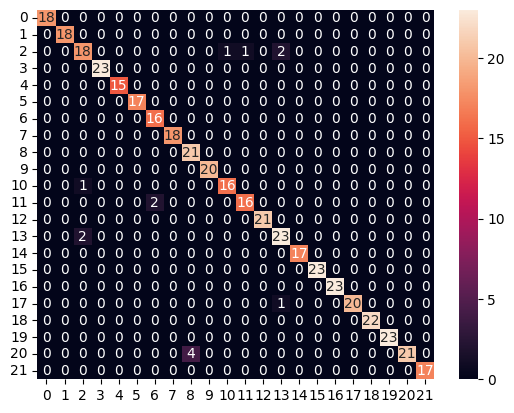

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.86      0.82      0.84        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        16
           7       1.00      1.00      1.00        18
           8       0.84      1.00      0.91        21
           9       1.00      1.00      1.00        20
          10       0.94      0.94      0.94        17
          11       0.94      0.89      0.91        18
          12       1.00      1.00      1.00        21
          13       0.88      0.92      0.90        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred_RandomForestClassifier = clf.predict(x_test)
accuracy_score(y_test, y_pred_RandomForestClassifier)


0.9977272727272727

In [ ]:
pd.DataFrame({
    'Acc Log. Reg': [accuracy_score(y_test, y_pred)  *100],
    'Acc Decision Tree': [accuracy_score(y_test, y_pred_DecisionTreeClassifier)  *100],
    'Acc Random Forest': [accuracy_score(y_test, y_pred_RandomForestClassifier)  *100],
    'Acc XGBoost': [accuracy_score(y_test, y_pred_XGBClassifier)  *100]
}, index=[0])

,Acc Log. Reg,Acc Decision Tree,Acc Random Forest,Acc XGBoost
0,96.818182,99.318182,99.772727,99.772727


In [ ]:
pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
    'y_pred_lr' : y_pred1,
    'y_pred_RandomForestClassifier' : y_pred_RandomForestClassifier
    })

,y_test,y_pred,y_pred_lr,y_pred_RandomForestClassifier
1320,21,21,13.223848,21
1367,21,21,13.792853,21
1291,7,7,4.836509,7
264,3,3,4.869849,3
728,2,2,9.550833,2
...,...,...,...,...
446,18,18,8.427245,18
1005,1,1,6.394308,1
1919,6,6,8.350408,6
708,2,2,9.778861,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred_DecisionTreeClassifier = clf.predict(x_test)
accuracy_score(y_test, y_pred)


0.9681818181818181

In [ ]:
pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
    'y_pred_lr' : y_pred1,
    'y_pred_RandomForestClassifier' : y_pred_RandomForestClassifier,
    'y_pred_DecisionTreeClassifier' : y_pred_DecisionTreeClassifier
    })

,y_test,y_pred,y_pred_lr,y_pred_RandomForestClassifier,y_pred_DecisionTreeClassifier
1320,21,21,13.223848,21,21
1367,21,21,13.792853,21,21
1291,7,7,4.836509,7,7
264,3,3,4.869849,3,3
728,2,2,9.550833,2,2
...,...,...,...,...,...
446,18,18,8.427245,18,18
1005,1,1,6.394308,1,1
1919,6,6,8.350408,6,6
708,2,2,9.778861,2,2


In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(x_train, y_train)

y_pred_XGBClassifier = clf.predict(x_test)
accuracy_score(y_test, y_pred)


0.9681818181818181

In [ ]:
pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
    'y_pred_lr' : y_pred1,
    'y_pred_RandomForestClassifier' : y_pred_RandomForestClassifier,
    'y_pred_DecisionTreeClassifier' : y_pred_DecisionTreeClassifier,
    'y_pred_XGBClassifier' : y_pred_XGBClassifier
    })

,y_test,y_pred,y_pred_lr,y_pred_RandomForestClassifier,y_pred_DecisionTreeClassifier,y_pred_XGBClassifier
1320,21,21,13.223848,21,21,21
1367,21,21,13.792853,21,21,21
1291,7,7,4.836509,7,7,7
264,3,3,4.869849,3,3,3
728,2,2,9.550833,2,2,2
...,...,...,...,...,...,...
446,18,18,8.427245,18,18,18
1005,1,1,6.394308,1,1,1
1919,6,6,8.350408,6,6,6
708,2,2,9.778861,2,2,2
